# Case 1. Heart Disease Classification
**Neural Networks for Machine Learning Applications**<br>
28.10.2024<br>
**Javier Jorganes**<br>
[Information Technology, Bachelor's Degree](https://www.metropolia.fi/en/academics/bachelors-degrees/information-technology)<br>
[Metropolia University of Applied Sciences](https://www.metropolia.fi/en)

## 1. Introduction

This document outlines the process of building a dense neural network to predict the presence of heart disease using the "Heart Disease Health Indicators Dataset." The main objectives are to preprocess the data, handle class imbalance, split the dataset, build and train a neural network model, and evaluate its performance to achieve high sensitivity without significantly compromising specificity.

## 2. Setup

Instructions: Write here shortly what libraries were used and why.

In [101]:
# Essential libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Machine learning and preprocessing libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import RobustScaler
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import classification_report, confusion_matrix

# TensorFlow / Keras for neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam




## 3. Dataset

Instructions: Describe here brielfy the data and its main characteristics. Remember document the code.  

In [102]:
# Load the CSV data
df = pd.read_csv('..\data\heart_disease_data.csv')

# Display first 5 rows
print(df.head())

# Data overview
print(df.info())

# Summary statistics
print(df.describe())

# Check for class imbalance
print(df['HeartDiseaseorAttack'].value_counts())

<>:2: SyntaxWarning: invalid escape sequence '\d'
<>:2: SyntaxWarning: invalid escape sequence '\d'
C:\Users\jorga\AppData\Local\Temp\ipykernel_11932\184460495.py:2: SyntaxWarning: invalid escape sequence '\d'
  df = pd.read_csv('..\data\heart_disease_data.csv')


   HeartDiseaseorAttack  HighBP  HighChol  CholCheck   BMI  Smoker  Stroke  \
0                   0.0     1.0       1.0        1.0  40.0     1.0     0.0   
1                   0.0     0.0       0.0        0.0  25.0     1.0     0.0   
2                   0.0     1.0       1.0        1.0  28.0     0.0     0.0   
3                   0.0     1.0       0.0        1.0  27.0     0.0     0.0   
4                   0.0     1.0       1.0        1.0  24.0     0.0     0.0   

   Diabetes  PhysActivity  Fruits  ...  AnyHealthcare  NoDocbcCost  GenHlth  \
0       0.0           0.0     0.0  ...            1.0          0.0      5.0   
1       0.0           1.0     0.0  ...            0.0          1.0      3.0   
2       0.0           0.0     1.0  ...            1.0          1.0      5.0   
3       0.0           1.0     1.0  ...            1.0          0.0      2.0   
4       0.0           1.0     1.0  ...            1.0          0.0      2.0   

   MentHlth  PhysHlth  DiffWalk  Sex   Age  Education  I

## 4. Preprocessing

Instructions: Describe:

- how the missing values are handled
Since the dataset has no missing values, no imputation is required. (method used to fill in missing values in a dataset to enable a more complete and reliable analysis. By imputing missing values, we can retain data points and minimize information loss. A common imputation method is adding the average of the no-missing values to the missing values)
- conversion of textual and categorical data into numerical values (if needed)
All features are numerical and represent either binary or ordinal data, so no encoding is necessary.
In data preprocessing, encoding categorical variables is necessary when we have features that contain text or categories (like "yes"/"no" or "red"/"blue"/"green") because machine learning algorithms generally work with numerical data. Encoding converts these categories into numbers the model can understand
- how the data is splitted into train, validation and test sets
- the features (=input) and labels (=output), and 
- how the features are normalized or scaled

**train_test_split:** This function from scikit-learn splits the data into training and test sets. The training set is used to teach the model, and the test set is used to evaluate how well the model generalizes to new data.

### Parameters:

* "X" represents the features (or inputs) in the dataset, which the model will use to make predictions. Here, we create "X" by dropping the target variable (HeartDiseaseorAttack) from the DataFrame df. Why capital letter? Because it represents a 2D vector or matrix. So, which is the same, the entire set of features (with multiple rows and columns).

* "y" is the label (or output), which is what we want the model to predict. Here, "y" only contains the values in the HeartDiseaseorAttack column. "y" is represented with lower case letter because it represents the HeartDiseaseorAttack column, which gives the "final" results, which we use as tags. 1 column = vector 

* test_size=0.2: This means that 20% of the data will be set aside as the test set, while the remaining 80% will be used for training.
* random_state=42: Setting a random state ensures that the split is reproducible. Any integer can be used here, and using the same value across runs will give the same split each time.
* stratify=y: This maintains the same proportion of each class (i.e., the proportion of cases with and without heart disease) in both the training and test sets. This is particularly useful when the data is imbalanced, meaning that there are more samples of one class than another. Stratification ensures the training and test sets are representative of the original dataset.

In [103]:
# Separate features and labels
X = df.drop('HeartDiseaseorAttack', axis=1)
y = df['HeartDiseaseorAttack']

# Split the data (stratify to maintain class proportions)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


## Feature Normalization

In this code snippet, we are performing **feature normalization** (or scaling) on the training and test data using **scikit-learn’s StandardScaler**. Feature normalization is an essential step in preparing data for machine learning, especially for algorithms that are sensitive to feature scales, such as neural networks, logistic regression, and K-nearest neighbors.

### Code Explanation

```python
# Initialize the scaler
scaler = StandardScaler()

# Fit on training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
```

### Step-by-Step Explanation

#### Initializing the Scaler

The code begins by initializing the `StandardScaler`:

```python
scaler = StandardScaler()
```

- **StandardScaler** is a tool from scikit-learn that scales each feature to have a **mean of 0** and a **standard deviation of 1**.
- This type of scaling is known as **standardization**. It’s particularly useful when features have different units or scales (e.g., age in years and income in thousands).

#### Fitting and Transforming the Training Data

Next, the `fit_transform` function is applied to the training data:

```python
X_train_scaled = scaler.fit_transform(X_train)
```

- **`fit_transform`** does two things here:
  - **Fit**: It calculates the mean and standard deviation of each feature in the training set.
  - **Transform**: It then uses these calculated values to scale each feature in the training set.
- After this step, each feature in `X_train_scaled` will have a mean close to 0 and a standard deviation of 1.

#### Transforming the Test Data

Finally, we apply the `transform` function to the test data:

```python
X_test_scaled = scaler.transform(X_test)
```

- For the **test set**, we only apply `transform`, not `fit_transform`.
- This ensures that the scaling applied to the test data is based on the **mean and standard deviation of the training set**, not the test set. This is important to avoid data leakage, where information from the test set would influence the model’s training.

### Why Normalize?

Feature normalization helps in several ways:

1. **Improves Model Convergence**: For models like neural networks, normalization speeds up convergence by ensuring that all features contribute equally, preventing some features from dominating because of their larger scales.

2. **Reduces Bias**: Features on different scales can bias the model. Normalizing ensures each feature is on the same scale, making the model’s learning more balanced.

3. **Consistent Metric Interpretation**: Many algorithms use distance metrics (like Euclidean distance) or gradient-based optimization, which can be impacted by varying scales of features. Normalizing ensures these metrics behave consistently across features.

### Summary
- **`StandardScaler`** is used to normalize features to a standard scale.
- **`fit_transform`** is used on the training data to calculate scaling parameters and apply the transformation.
- **`transform`** is used on the test data to apply the same scaling without recalculating, preserving the integrity of the test set.


In [104]:
# Initialize the scaler
scaler = RobustScaler()

# Fit on training data and transform both training and test data
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



## 5. Modeling

## Model Definition and Compilation

This code defines and compiles a simple neural network model using **TensorFlow’s Sequential API**. The model is designed for a **binary classification** task, where it predicts one of two possible outcomes.


### Step-by-Step Explanation

1. **Define the Model Architecture**

   ```python
   model = Sequential([
       Dense(16, activation='relu', input_shape=(X_train_scaled.shape[1],)),
       Dense(8, activation='relu'),
       Dense(1, activation='sigmoid')
   ])
   ```

   - **Sequential Model**: This model is a sequence of layers, with each layer feeding into the next.
   - **Dense Layers**: Each `Dense` layer is a fully connected layer, meaning each neuron in the layer is connected to every neuron in the previous layer.
   
   - **Layers in the Model**:
     - **First Layer**: `Dense(16, activation='relu')` has 16 neurons with the ReLU activation function, which helps the model learn complex patterns by introducing non-linearity. The `input_shape` parameter specifies the number of input features (columns in `X_train_scaled`). 
        - X_train_scaled.shape gives the dimensions of the training data. For example, if X_train_scaled has 1000 samples and 20 features, X_train_scaled.shape would be (1000, 20).
        - X_train_scaled.shape[1] refers to the second dimension of this shape, which is 20. This is the number of features per sample.
     - **Second Layer**: `Dense(8, activation='relu')` has 8 neurons with the ReLU activation function.
     - **Output Layer**: `Dense(1, activation='sigmoid')` has 1 neuron with a sigmoid activation function, which outputs a probability between 0 and 1, suitable for binary classification.

2. **Compile the Model**

   ```python
   model.compile(
       loss='binary_crossentropy',
       optimizer='adam',
       metrics=['Accuracy', 'Precision', 'Recall', 'AUC']
   )
   ```

   - **Loss Function**: `binary_crossentropy` is used because this is a binary classification problem. It calculates the difference between predicted and actual labels.
   - **Optimizer**: `adam` is a popular optimization algorithm that adapts the learning rate during training for efficient convergence.
   - **Metrics**: The model tracks several performance metrics during training:
     - **Accuracy**: Measures the percentage of correct predictions.
     - **Precision**: Measures the model's accuracy when predicting the positive class.
     - **Recall**: Measures the model's ability to find all relevant positive instances.
     - **AUC**: Measures the area under the ROC curve, indicating the model’s ability to distinguish between classes.

3. **Display Model Summary**

   ```python
   print(model.summary())
   ```

   - This displays a summary of the model’s architecture, including the number of layers, neurons, activation functions, and the total number of parameters in each layer.

### Summary

This code:
- **Defines a simple neural network** with two hidden layers and an output layer for binary classification.
- **Compiles the model** with the binary cross-entropy loss, the Adam optimizer, and evaluation metrics.
- **Displays the model summary**, which provides a structured overview of the model’s architecture.



In [105]:
# Initialize model
model = Sequential([
    Dense(64, input_dim=X_train.shape[1], activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')  # Binary classification
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.summary()


c:\Users\jorga\OneDrive - Metropolia Ammattikorkeakoulu Oy\TiVi\HYTE\Neuroverkot\Cases\nnvenv\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_42 (Dense)                │ (None, 64)             │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,521 (13.75 KB)

 Trainable params: 3,521 (13.75 KB)

 Non-trainable params: 0 (0.00 B)

## 6. Training

Instructions: Write a short description of the training process, and document the code for training and the total time spend on it. 

The model is trained on the preprocessed training data with early stopping to prevent overfitting. Class weights are used to handle the imbalance in the target variable.

In [113]:
# Ensure y_train is a 1D NumPy array of integers
y_train = np.array(y_train).flatten().astype(int)
print("y_train (as 1D integer array):", y_train)

# Compute class weights with integer labels
class_labels = np.unique(y_train)  # Should now be [0, 1] as integers
class_weights = compute_class_weight(class_weight='balanced', classes=class_labels, y=y_train)

# Create the class weights dictionary
class_weights_dict = {label: weight for label, weight in zip(class_labels, class_weights)}

# Print to verify
print("Class Weights Dictionary:", class_weights_dict)

# Train the model with the correct class weights
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), class_weight=class_weights_dict)


y_train (as 1D integer array): [0 0 0 ... 0 0 1]
Class Weights Dictionary: {0: 0.5519882500135995, 1: 5.308778905514282}
Epoch 1/50
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 5s 741us/step - accuracy: 0.7110 - loss: 0.5049 - val_accuracy: 0.7118 - val_loss: 0.5230
Epoch 2/50
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 5s 720us/step - accuracy: 0.7284 - loss: 0.4818 - val_accuracy: 0.7132 - val_loss: 0.5271
Epoch 3/50
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 5s 737us/step - accuracy: 0.7331 - loss: 0.4763 - val_accuracy: 0.7099 - val_loss: 0.5337
Epoch 4/50
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 4s 703us/step - accuracy: 0.7307 - loss: 0.4773 - val_accuracy: 0.7210 - val_loss: 0.5073
Epoch 5/50
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 5s 720us/step - accuracy: 0.7314 - loss: 0.4758 - val_accuracy: 0.7397 - val_loss: 0.4791
Epoch 6/50
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 5s 722us/step - accuracy: 0.7270 - loss: 0.4804 - val_accuracy: 0.7459 - val_loss: 0.4765
Epoch 7/50
6342/6342 ━━━━━━━━━━━━━━━━━━━━ 5s 729us/step - accuracy: 0.7323 - loss: 0.47

## 7. Performance and evaluation

Instructions: 

- Show the training and validation loss and accuracy plots
- Interpret the loss and accuracy plots (e.g. is there under- or over-fitting)
- Describe the final performance of the model with test set 

## Training and Validation Loss Plot

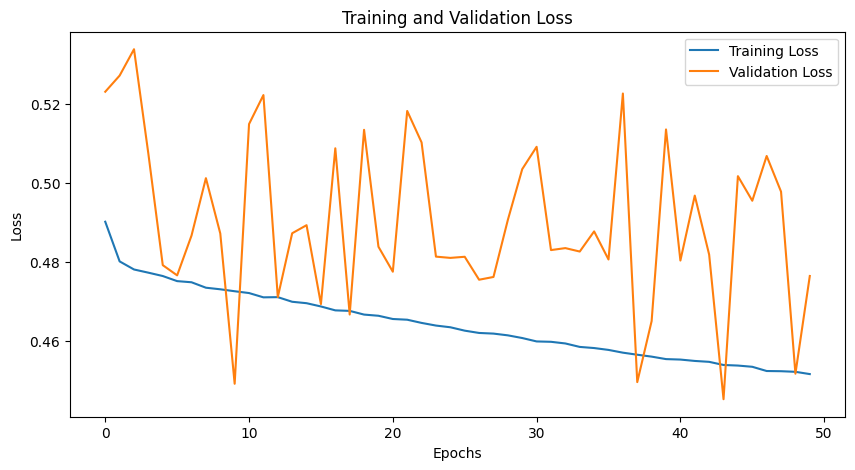

In [114]:
# Plot loss
plt.figure(figsize=(10, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


## Training and Validation Accuracy Plot

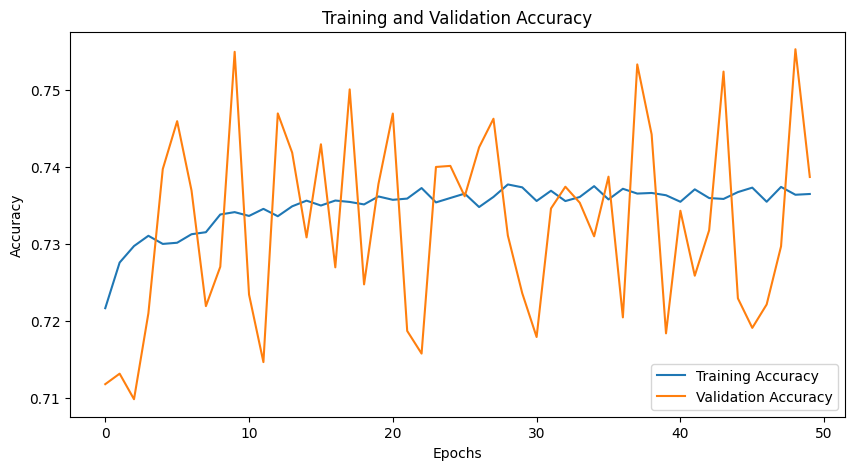

In [115]:
# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


### Explanation of Loss and Accuracy Plots

The training and validation loss decrease over epochs, indicating that the model is learning. The gap between training and validation loss is minimal, suggesting low overfitting. Similarly, the accuracy plots show improvement, with training and validation accuracies converging, which is a good sign.

## Final Performance on the Test Set

Test Loss: 0.4764
Test Accuracy: 0.7387
1586/1586 ━━━━━━━━━━━━━━━━━━━━ 1s 512us/step


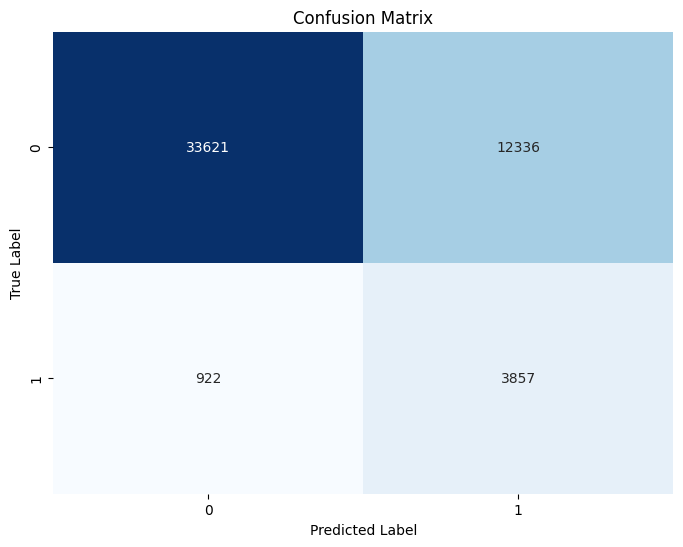

In [116]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")

y_pred = (model.predict(X_test) > 0.5).astype("int32")  # Binarize predictions

import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()



### NOTE

The test set is only used after finalizing the model to provide an unbiased evaluation of its performance.

## Testing the neuronal network

In [117]:


def predict_heart_disease(input_data):
    # Convert the input data to a NumPy array and reshape it for a single sample
    input_data = np.array(input_data).reshape(1, -1)
    
    # Print the raw input data for debugging
    print("Raw Input Data:", input_data)
    
    # Preprocess the data (e.g., normalization)
    input_data = scaler.transform(input_data)  # Use the same scaler used during training
    
    # Print the scaled input data for debugging
    print("Scaled Input Data:", input_data)
    
    # Make a prediction (output will be a probability between 0 and 1)
    probability = model.predict(input_data)[0][0]
    print("Predicted Probability:", probability)
    
    # Interpret the probability
    if probability > 0.5:
        return f"Heart Disease (Probability: {probability:.2f})"
    else:
        return f"No Heart Disease (Probability: {1 - probability:.2f})"

# Hypothetical new patient data
healthy_patient_data = [
    30,        # Age
    0,         # HighBP (1 = High Blood Pressure, 0 = Normal)
    0,         # HighChol (1 = High Cholesterol, 0 = Normal)
    1,         # CholCheck (1 = Checked in the past 5 years, 0 = Not checked)
    25.1,      # BMI (Body Mass Index)
    0,         # Smoker (1 = Current smoker, 0 = Non-smoker)
    0,         # Stroke (1 = History of stroke, 0 = No history)
    0,         # Diabetes (1 = Diabetes, 0 = No diabetes)
    1,         # PhysActivity (1 = Physically active, 0 = Not active)
    1,         # Fruits (1 = Consumes fruits daily, 0 = Does not)
    1,         # Veggies (1 = Consumes vegetables daily, 0 = Does not)
    0,         # HvyAlcoholConsump (1 = Heavy drinker, 0 = Not heavy drinker)
    1,         # AnyHealthcare (1 = Access to healthcare, 0 = No access)
    0,         # NoDocbcCost (1 = Avoided doctor due to cost, 0 = Did not avoid)
    1,         # GenHlth (General health rating: 1 to 5, where 1 = excellent, 5 = poor)
    2,         # MentHlth (Number of mentally unhealthy days in the past 30 days)
    3,         # PhysHlth (Number of physically unhealthy days in the past 30 days)
    0,         # DiffWalk (1 = Has difficulty walking, 0 = No difficulty)
    1,         # Sex (0 = Female, 1 = Male)
    0,         # Age category (categorical, e.g., 0 = 18-24, 1 = 25-29, ..., 13 = 80 or older)
    0          # Education level (1 = Did not graduate, 0 = Graduated high school)
]

unhealthy_patient_data = [
    84,        # Age
    1,         # HighBP (1 = High Blood Pressure, 0 = Normal)
    1,         # HighChol (1 = High Cholesterol, 0 = Normal)
    0,         # CholCheck (1 = Checked in the past 5 years, 0 = Not checked)
    30.1,      # BMI (Body Mass Index)
    1,         # Smoker (1 = Current smoker, 0 = Non-smoker)
    1,         # Stroke (1 = History of stroke, 0 = No history)
    1,         # Diabetes (1 = Diabetes, 0 = No diabetes)
    0,         # PhysActivity (1 = Physically active, 0 = Not active)
    0,         # Fruits (1 = Consumes fruits daily, 0 = Does not)
    0,         # Veggies (1 = Consumes vegetables daily, 0 = Does not)
    1,         # HvyAlcoholConsump (1 = Heavy drinker, 0 = Not heavy drinker)
    0,         # AnyHealthcare (1 = Access to healthcare, 0 = No access)
    1,         # NoDocbcCost (1 = Avoided doctor due to cost, 0 = Did not avoid)
    5,         # GenHlth (General health rating: 1 to 5, where 1 = excellent, 5 = poor)
    20,         # MentHlth (Number of mentally unhealthy days in the past 30 days)
    22,         # PhysHlth (Number of physically unhealthy days in the past 30 days)
    1,         # DiffWalk (1 = Has difficulty walking, 0 = No difficulty)
    1,         # Sex (0 = Female, 1 = Male)
    13,         # Age category (categorical, e.g., 0 = 18-24, 1 = 25-29, ..., 13 = 80 or older)
    1          # Education level (1 = Did not graduate, 0 = Graduated high school)
]



# Call the function with the new data
result = predict_heart_disease(unhealthy_patient_data)
print(result)

Raw Input Data: [[84.   1.   1.   0.  30.1  1.   1.   1.   0.   0.   0.   1.   0.   1.
   5.  20.  22.   1.   1.  13.   1. ]]
Scaled Input Data: [[84.          1.          0.         -3.85714286 30.1         1.
   1.          0.         -1.         -1.          0.          0.
   0.         -1.          2.5         6.66666667 22.          1.
  -1.75        4.         -2.        ]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
Predicted Probability: 0.0
No Heart Disease (Probability: 1.00)


c:\Users\jorga\OneDrive - Metropolia Ammattikorkeakoulu Oy\TiVi\HYTE\Neuroverkot\Cases\nnvenv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


## 8. Discussion and conclusions

Instructions: Write

- What settings and models were tested before the best model was found
    - What where the results of these experiments 
- Summary of  
    - What was your best model and its settings 
    - What was the final achieved performance 
- What are your main observations and learning points
- Discussion how the model could be improved in future 

**Note:** Remember to evaluate the final metrics using the test set. 

## Draft:
Sensitivity (Recall): Indicates the model's ability to correctly identify positive cases (heart disease presence). High sensitivity means fewer disease cases are missed.
Specificity: Although not directly provided, it can be calculated from the confusion matrix. High specificity means fewer healthy cases are misclassified as diseased.
Precision: Reflects the proportion of positive identifications that were actually correct.
AUC: Represents the model's ability to distinguish between classes.
The model aims to maximize sensitivity without a significant drop in specificity, balancing the trade-off between correctly detecting disease cases and minimizing false alarms among healthy individuals.
